# 데이터 불러오기 및 데이터 파악

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [3]:
url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
df_origin = pd.read_csv(url)

In [4]:
df = df_origin.copy()

In [5]:
df.sample(10)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
14320,14321,Crash City Mayhem,GBA,2004.0,Racing,THQ,0.67,0.25,0,0.02
688,689,Section 8,PC,2009.0,Shooter,SouthPeak Games,0.01,0.01,0,0
5384,5385,Bratz: Super Babyz,DS,2008.0,Action,THQ,0.26,0,0,0.02
4990,4991,Cloudy With a Chance of Meatballs,PSP,2009.0,Platform,Ubisoft,0.07,0,0,0.01
11692,11693,Mahjong 300,DS,2011.0,Puzzle,Avanquest,0,0.03,0,0
1995,1996,Wacky Races: Crash & Dash,DS,2008.0,Racing,Eidos Interactive,0.19,0,0,0.01
16573,16574,Finding Nemo,PS2,2003.0,Action,THQ,1.26,0.6,0.05,0.18
3527,3528,F1 Race Stars,PC,2012.0,Racing,Codemasters,0,0.02,0,0
3824,3825,Medal of Honor: Rising Sun,XB,2003.0,Shooter,Electronic Arts,0.76,0.36,0,0.05
7413,7414,Mario no Super Picross,SNES,1995.0,Puzzle,Nintendo,0,0,0.41,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


1. Unnamed: 0 → index 이므로 삭제.

2. Name → 중복값 존재하지만 전체적으로는 중복값이 없다는 결과가 나옴. 중복된 이름에 대한 정보를 확인해 볼 것.

3. Year → float 형식이므로 int 형식으로 바꿔줌.

  Year → 연도가 아닌 이상치 다수 존재(삭제? 대체?)

4. Year, Genre, Publisher → 결측치 존재.(삭제할 것인지, 대체할 내용이 있는지, 중복내용이 있는지 확인할 것)

5. _Sales → object 형식. 단위 K를 숫자로 바꿔서 float형태로 바꿔줄 것.(describe로 이상치 있나 확인해 볼 수 있을 듯)



--------
# 해결해보기

## Day1

---

1. Unnamed: 0

  index 이므로 삭제.

In [7]:
df = df.drop('Unnamed: 0', axis=1) #1번 해결

In [8]:
df[df.duplicated()==True]
df[df.Name == 'Wii de Asobu: Metroid Prime']
df = df.drop_duplicates()
df.duplicated().sum()
#중복값 확인 후 삭제(Year 결측치, 나머지 값 모두 검색해보니 같은 이름의 게임이 리마스터되어 출시되었는데 플랫폼이 달랐고 Year가 결측치라 다른지 알 수 없었음.)

0

--------------------
2. Name → 중복값 존재하지만 전체적으로는 중복값이 없다는 결과가 나옴. 중복된 이름에 대한 정보를 확인해 볼 것.

- 중복된 값들은 년도와 플랫폼이 다른 경우가 있었다.
- 중복값 중 결측치가 있는 것들(년도, 장르, 개발 회사)은 같은 값으로 채워준다.

In [9]:
df.isnull().sum()   #결측치 처리하기 전 결측치 갯수수

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [10]:
name_dup = df[df.duplicated(subset=['Name'], keep=False)]     #중복된 값의 결측치 갯수
name_dup.isnull().sum()

Name             0
Platform         0
Year           147
Genre           20
Publisher        7
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [11]:
# same_name_list = name_dup[(name_dup.iloc[0]['Name'] == name_dup['Name'])==True]  # 중복데이터 중에서 같은 이름들을 묶어줌.

In [12]:
for i in range(len(name_dup)):
  same_name_list = name_dup[(name_dup.iloc[i]['Name'] == name_dup['Name'])==True]
  values = {"Year": same_name_list['Year'].unique()[0], "Genre": same_name_list['Genre'].unique()[0], "Publisher": same_name_list['Publisher'].unique()[0]}
  if same_name_list['Year'].isnull().sum() > 0:
    name_dup.fillna(value=values, inplace=True)
  elif same_name_list['Genre'].isnull().sum() > 0:
    name_dup.fillna(value=values, inplace=True)
  elif same_name_list['Publisher'].isnull().sum() > 0:
    name_dup.fillna(value=values, inplace=True)
  else:
    pass

# 중복 데이터에서 같은 이름들을 묶어주고 그 중 비어있는 값들을 같은 이름들이 가진 값으로 채워줌.

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [13]:
name_dup[(name_dup['Name'] == "World of Tanks") == True]  #Year와 Publisher가 같은 값으로 변한 것을 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
27,World of Tanks,PC,2011.0,Shooter,Wargaming.net,0,0.23,0,0.06
2070,World of Tanks,X360,2011.0,Shooter,Wargaming.net,0,0.03,0,0


In [14]:
df = df.combine_first(name_dup)   # 원본 데이터에 수정한 데이터 정보를 합쳐줌.

In [15]:
df.isnull().sum()

Name             0
Platform         0
Year           123
Genre           30
Publisher       51
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

**중복된 이름들의 결측치를 제외하고 남은 결측치 파악**

**결측치 확인 결과**
- 모든 결측치를 삭제하기엔 유의미한 값의 Sales값이 섞여 있는 것들이 있었다.
- Sales값을 float형태로 바꿔 합친 후 그 값이 높은 것들만 살리고 나머지는 삭제하는 것이 좋을 것 같다.

--------------------------
5. _Sales → object to float

- K와 M으로 표시된 수치들 숫자로 변환(0.25M, 0.03M같은 값과 1610K같은 값들이 존재함.)
- M(1,000,000)은 기본 단위이기 때문에 M을 지워준다.
- K(1,000)는 소수점으로 표현된 수치가 없으므로 K를 000으로 대체해 주고, million의 단위에 맞게 고쳐준다.

In [16]:
df1 = df.copy().reset_index(drop=True)    #reset_index 안해줘서 누락된 값이 있었음. drop 후 꼭 index 리셋해줄 것

In [17]:
df1['EU_Sales'][df1['EU_Sales'].str.contains('[^_!.\d+]')].sample(10)

16114    0.01M
14663       0M
3379     0.16M
4687     0.02M
1515        0M
4081       40K
2730       10K
2269        0M
6816        0M
16267    0.05M
Name: EU_Sales, dtype: object

In [18]:
sales = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
for i in range(len(sales)):
  df1[sales[i]].replace('M', '',inplace=True, regex=True)

- 목록에 들어있는 M글자 삭제 완료
---

## DAY 2

In [19]:
for i in sales:
  df1[i] = df1[i].str.replace('K', '000', regex=True)
  df1[i] = df1[i].astype('float')
  ind=0
  for k in df1[i]:
    if k > 10:
      df1[i].loc[ind] = k * 1/1000000
      ind+=1
    else:
      ind+=1

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [20]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)   #float 형태가 5.200000e-1 이런 형태로 나와서 포맷을 바꿔줌.

- K 삭제 후 million 단위로 바꿔줌.

---
- 세 목록의 결측치들 가지고 있는 데이터에 비해 많지 않으므로 삭제.
- Publisher가 Unknown인 것도 데이터에 비해 많지 않으므로 삭제

In [21]:
df1.isnull().sum()

Name             0
Platform         0
Year           123
Genre           30
Publisher       51
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [22]:
nan = df1[(df1['Year'].isnull()==True) | (df1['Genre'].isnull()==True) | (df1['Publisher'].isnull()==True)]
df1.drop(nan.index, inplace=True)

In [23]:
unknown = df1[df1['Publisher']=='Unknown']
df1.drop(unknown.index, inplace=True)

---
- 결측치 모두 삭제 후 Year 항목 이상치 수정해야 함.

In [24]:
df2 = df1.copy().reset_index(drop=True)

In [25]:
df2['Year'] = df2['Year'].astype('int')
df2['Year'].dtype

dtype('int64')

In [26]:
k=0
for i in df2['Year']:
  if i < 30:
    df2['Year'].loc[k] = i + 2000
    k += 1
  elif (i > 50 and i <100):
    df2['Year'].loc[k] = i + 1900
    k += 1
  else:
    k += 1

In [27]:
lessyear = df2[df2['Year']>2016]
df2 = df2.drop(lessyear.index)

- 연도 이상치 수정 완료

---
# 데이터 정보 분석

- 장르별 매출

In [87]:
df3 = df2.copy().reset_index(drop=True)

In [88]:
df3['Sales'] = df3['NA_Sales'] + df3['EU_Sales'] + df3['JP_Sales'] + df3['Other_Sales']

In [89]:
genre = df3.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
genre.NA_Sales.sort_values(ascending=False)

Genre
Action         868.60
Sports         616.74
Shooter        558.60
Misc           369.62
Platform       366.62
Racing         339.32
Role-Playing   306.19
Fighting       220.93
Simulation     181.39
Adventure      101.44
Puzzle          98.13
Strategy        68.20
Name: NA_Sales, dtype: float64

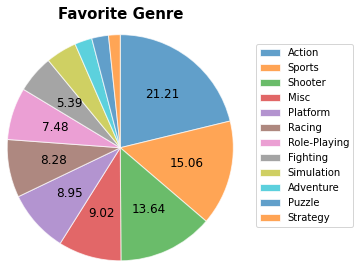

In [90]:
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 5 else ''

plt.pie(genre.NA_Sales.sort_values(ascending=False), autopct=my_autopct, startangle=90, counterclock=False, radius=1.3,
        textprops=dict(size=12), wedgeprops=dict(edgecolor='white', alpha=0.7));
plt.title('Favorite Genre', fontsize=15, pad=20, fontweight='bold')
plt.legend(labels=genre.NA_Sales.sort_values(ascending=False).index, bbox_to_anchor=(1.1, 0, 0, 1))
plt.show()

In [91]:
genre[genre['NA_Sales'] > genre.mean()[0]].index

Index(['Action', 'Misc', 'Platform', 'Shooter', 'Sports'], dtype='object', name='Genre')

In [92]:
genre[genre['EU_Sales'] > genre.mean()[1]].index

Index(['Action', 'Misc', 'Platform', 'Racing', 'Shooter', 'Sports'], dtype='object', name='Genre')

In [93]:
genre[genre['JP_Sales'] > genre.mean()[2]].index

Index(['Action', 'Platform', 'Role-Playing', 'Sports'], dtype='object', name='Genre')

In [95]:
genre[genre['Other_Sales'] > genre.mean()[3]].index

Index(['Action', 'Misc', 'Racing', 'Shooter', 'Sports'], dtype='object', name='Genre')

In [96]:
df3.mean()

<ipython-input-96-e585dc5367fc>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3.mean()


Year          2006.41
NA_Sales         0.25
EU_Sales         0.14
JP_Sales         0.08
Other_Sales      0.05
Sales            0.52
dtype: float64

In [37]:
# plt.rc('font', family='Gothic') 

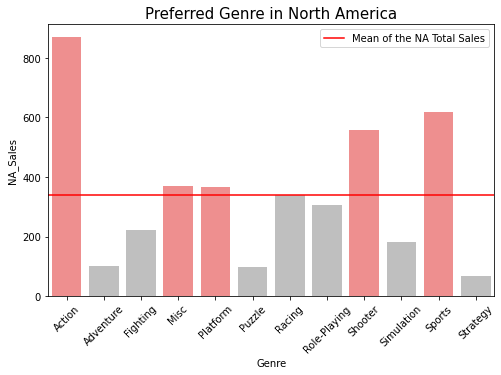

In [97]:
plt.figure(figsize=[8,5])
cols1 = ['red' if (x > genre['NA_Sales'].mean()) else 'grey' for x in genre['NA_Sales']]
sns.barplot(data=genre, x=genre.index, y='NA_Sales', alpha=.5, palette=cols1)
plt.axhline(genre['NA_Sales'].mean(), c='red', label='Mean of the NA Total Sales')
plt.title('Preferred Genre in North America',fontsize=15)
plt.xticks(rotation=45)
plt.legend();

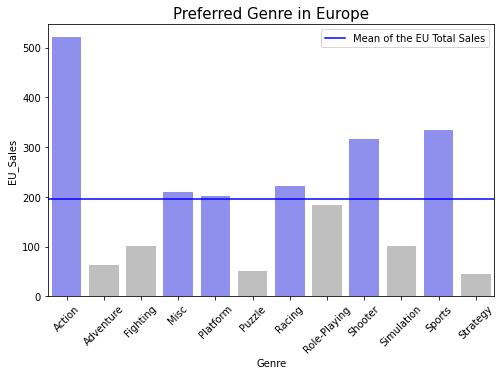

In [39]:
plt.figure(figsize=[8,5])
cols1 = ['blue' if (x > genre['EU_Sales'].mean()) else 'grey' for x in genre['EU_Sales']]
sns.barplot(data=genre, x=genre.index, y='EU_Sales', alpha=.5, palette=cols1)
plt.axhline(genre['EU_Sales'].mean(), c='blue', label='Mean of the EU Total Sales')
plt.title('Preferred Genre in Europe',fontsize=15)
plt.xticks(rotation=45)
plt.legend();

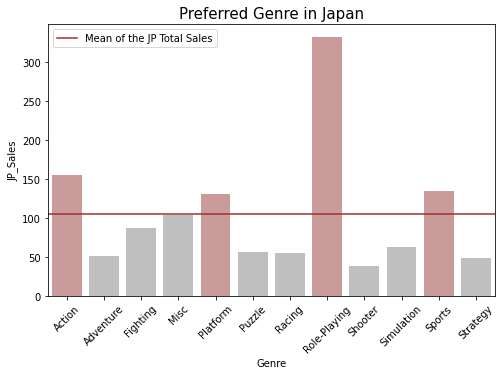

In [40]:
plt.figure(figsize=[8,5])
cols1 = ['brown' if (x > genre['JP_Sales'].mean()) else 'grey' for x in genre['JP_Sales']]
sns.barplot(data=genre, x=genre.index, y='JP_Sales', alpha=.5, palette=cols1)
plt.axhline(genre['JP_Sales'].mean(), c='brown', label='Mean of the JP Total Sales')
plt.title('Preferred Genre in Japan',fontsize=15)
plt.xticks(rotation=45)
plt.legend();

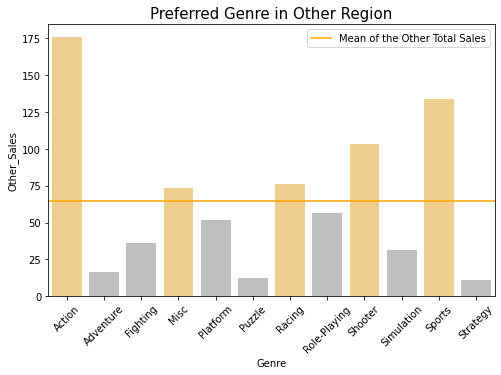

In [41]:
plt.figure(figsize=[8,5])
cols1 = ['orange' if (x > genre['Other_Sales'].mean()) else 'grey' for x in genre['Other_Sales']]
sns.barplot(data=genre, x=genre.index, y='Other_Sales', alpha=.5, palette=cols1)
plt.axhline(genre['Other_Sales'].mean(), c='orange', label='Mean of the Other Total Sales')
plt.title('Preferred Genre in Other Region',fontsize=15)
plt.xticks(rotation=45)
plt.legend();

- 그래프를 통해 지역별 선호 장르를 알 수 있다.
---

- 연도별 게임 트렌드 (장르 / 플랫폼)

## DAY 3

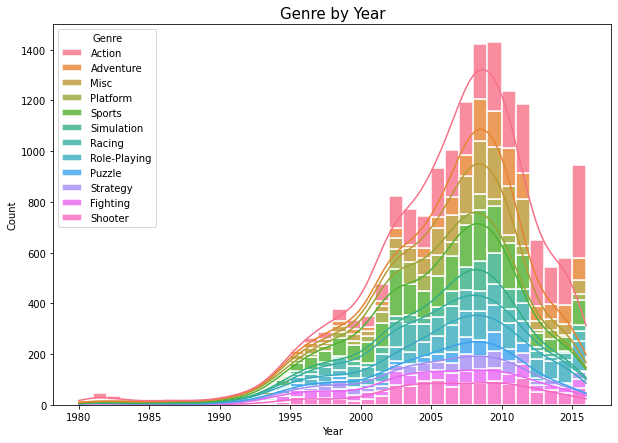

In [42]:
plt.figure(figsize=[10,7])
Year = np.arange(1980, df3.Year.max()+1, 1)
sns.histplot(df3, x='Year', hue='Genre', bins=Year, kde=True, multiple="stack", edgecolor='white', linewidth=1.5, alpha=.8)
plt.title('Genre by Year', fontsize=15);

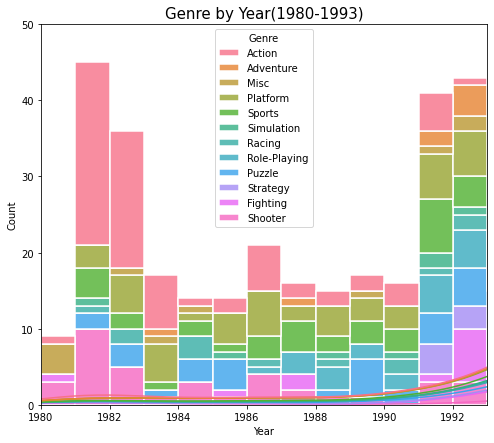

In [43]:
plt.figure(figsize=[8,7])
Year = np.arange(1980, 1995+1, 1)
sns.histplot(df3, x='Year', hue='Genre', bins=Year, kde=True, multiple="stack", edgecolor='white', linewidth=1.5, alpha=.8)
plt.xlim(1980,1993)
plt.ylim(0,50)
plt.title('Genre by Year(1980-1993)', fontsize=15);

In [44]:
df4 = df3.copy()
for i in df4['Platform']:
  if i == 'PSP':
    df4['Platform'] = df4['Platform'].str.replace('PSP', 'PS')
  elif i == 'PS2':
    df4['Platform'] = df4['Platform'].str.replace('PS2', 'PS')
  elif i == 'PS3':
    df4['Platform'] = df4['Platform'].str.replace('PS3', 'PS')
  elif i == 'PS4':
    df4['Platform'] = df4['Platform'].str.replace('PS4', 'PS')
  elif i == 'PSV':
    df4['Platform'] = df4['Platform'].str.replace('PSV', 'PS')
  elif i == 'X360':
    df4['Platform'] = df4['Platform'].str.replace('X360', 'XBOX')
  elif i == 'XB':
    df4['Platform'] = df4['Platform'].str.replace('XB', 'XBOX')
  elif i == 'XOne':
    df4['Platform'] = df4['Platform'].str.replace('XOne', 'XBOX')
  else:
    pass

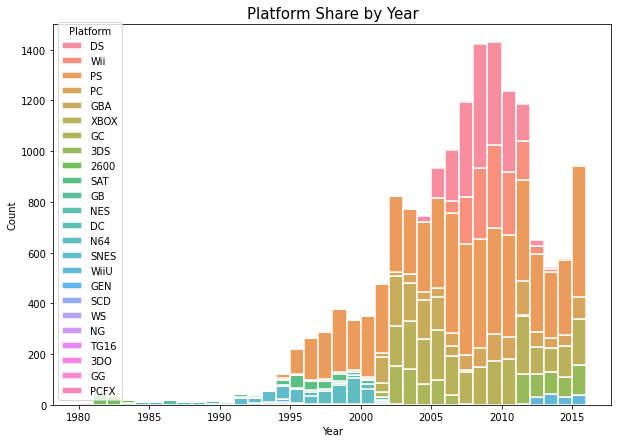

In [45]:
plt.figure(figsize=[10,7])
Year = np.arange(1980, df3.Year.max()+1, 1)
sns.histplot(df4, x='Year', hue='Platform', bins=Year, multiple="stack", edgecolor='white', linewidth=1.5, alpha=.8)
plt.title('Platform Share by Year', fontsize=15);

- 꾸준히 Action장르의 소비가 가장 많으므로 연도별 트렌드는 없는 것으로 보인다.
---

- 한 해의 평균 매출량보다 많은 매출량을 기록한 게임이 인기있는 게임이라고 설정
- 왜 인기가 많은가 : 장르나 플랫폼 살펴보기
- 이를 통해 어떤 인사이트를 도출할 수 있는가?

In [112]:
year = df3['Year'].value_counts().index
d={'mean': []}
ym_list = pd.DataFrame(data=d)
def mean(region):
  for i in year:
    year_mean = df3[df3['Year']==i][region].mean()
    ym_list.loc[i] = year_mean
  return ym_list

mean_NA = mean('NA_Sales').sort_index()
mean_EU = mean('EU_Sales').sort_index()
mean_JP = mean('JP_Sales').sort_index()
mean_Other = mean('Other_Sales').sort_index()

In [113]:
d={'Name':[], 'Platform':[], 'Year':[], 'Genre':[], 'Publisher':[], 'NA_Sales':[], 'EU_Sales':[], 'JP_Sales':[], 'Other_Sales':[], 'Sales':[]}
popNA = pd.DataFrame(data=d)

for i in mean_NA.index:
  year = df3[df3['Year']==i]
  year_mean = year[year['NA_Sales'] > mean_NA.loc[i][0]]
  popNA = popNA.append(year_mean)
# 
popEU = pd.DataFrame(data=d)
for i in mean_EU.index:
  year = df3[df3['Year']==i]
  year_mean = year[year['EU_Sales'] > mean_EU.loc[i][0]]
  popEU = popEU.append(year_mean)
# 
popJP = pd.DataFrame(data=d)
for i in mean_JP.index:
  year = df3[df3['Year']==i]
  year_mean = year[year['JP_Sales'] > mean_JP.loc[i][0]]
  popJP = popJP.append(year_mean)
# 
popOther = pd.DataFrame(data=d)
for i in mean_Other.index:
  year = df3[df3['Year']==i]
  year_mean = year[year['Other_Sales'] > mean_Other.loc[i][0]]
  popOther = popOther.append(year_mean)

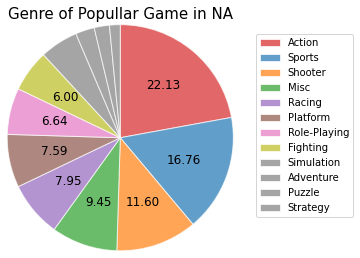

In [121]:
NA_gen = popNA['Genre'].value_counts()

def my_autopct(pct):
    return ('%.2f' % pct) if pct > 5.5 else ''

labels1=NA_gen.index
cdict1 = {'Action':'tab:red', 'Sports':'tab:blue', 'Shooter':'tab:orange', 'Misc':'tab:green', 'Racing':'tab:purple', 'Platform':'tab:brown', 'Role-Playing':'tab:pink',
         'Fighting':'tab:olive', 'Simulation':'grey', 'Adventure':'grey', 'Puzzle':'grey', 'Strategy':'grey'}

plt.pie(NA_gen, autopct=my_autopct, startangle=90, counterclock=False, radius=1.3,
        textprops=dict(size=12), wedgeprops=dict(edgecolor='white', alpha=0.7), colors=[cdict1[x] for x in labels1]);
plt.title('Genre of Popullar Game in NA', fontsize=15, pad=10)
plt.legend(labels=NA_gen.index, bbox_to_anchor=(1.1, 0, 0, 1))
plt.show()

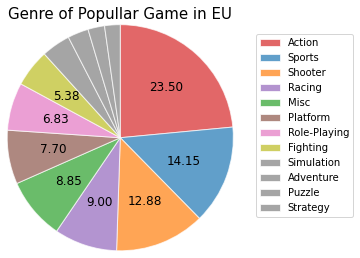

In [120]:
EU_gen = popEU['Genre'].value_counts()

def my_autopct(pct):
    return ('%.2f' % pct) if pct > 5 else ''

labels1=EU_gen.index

plt.pie(EU_gen, autopct=my_autopct, startangle=90, counterclock=False, radius=1.3,
        textprops=dict(size=12), wedgeprops=dict(edgecolor='white', alpha=0.7), colors=[cdict1[x] for x in labels1]);
plt.title('Genre of Popullar Game in EU', fontsize=15, pad=10)
plt.legend(labels=EU_gen.index, bbox_to_anchor=(1.1, 0, 0, 1))
plt.show()

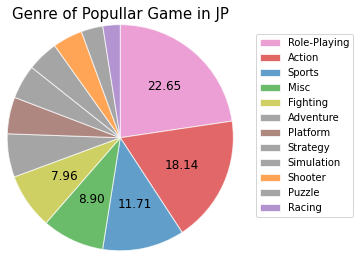

In [119]:
JP_gen = popJP['Genre'].value_counts()

def my_autopct(pct):
    return ('%.2f' % pct) if pct > 7 else ''

labels1=JP_gen.index

plt.pie(JP_gen, autopct=my_autopct, startangle=90, counterclock=False, radius=1.3,
        textprops=dict(size=12), wedgeprops=dict(edgecolor='white', alpha=0.7), colors=[cdict1[x] for x in labels1]);
plt.title('Genre of Popullar Game in JP', fontsize=15, pad=10)
plt.legend(labels=JP_gen.index, bbox_to_anchor=(1.1, 0, 0, 1))
plt.show()

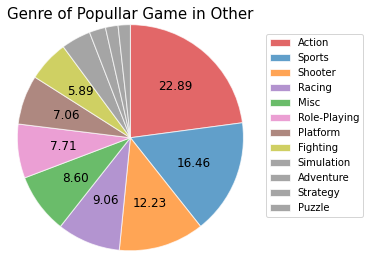

In [323]:
Other_gen = popOther['Genre'].value_counts()

def my_autopct(pct):
    return ('%.2f' % pct) if pct > 5 else ''

labels1=Other_gen.index

plt.pie(Other_gen, autopct=my_autopct, startangle=90, counterclock=False, radius=1.3,
        textprops=dict(size=12), wedgeprops=dict(edgecolor='white', alpha=0.7), colors=[cdict1[x] for x in labels1]);
plt.title('Genre of Popullar Game in Other', fontsize=15, pad=10)
plt.legend(labels=Other_gen.index, bbox_to_anchor=(1.1, 0, 0, 1))
plt.show()

---
- 인기 게임의 플랫폼 비율

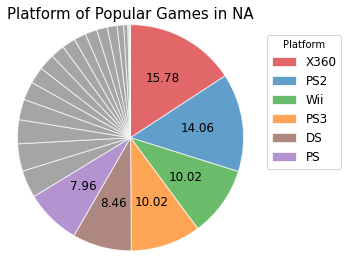

In [325]:
NA_pub = popNA.groupby('Platform')['NA_Sales'].sum()
NA_pub = NA_pub.sort_values(ascending=False)

def my_autopct(pct):
    return ('%.2f' % pct) if pct > 5 else ''
labels=NA_pub.index
cdict = {'X360':'tab:red', 'PS2':'tab:blue', 'PS3':'tab:orange', 'Wii':'tab:green', 'PS':'tab:purple', 'DS':'tab:brown',
         'GBA':'grey', 'XB':'grey', 'N64':'grey', 'GC':'grey', 'PS4':'grey', '2600':'grey', 'PC':'grey', 'XOne':'grey', 'GB':'grey', 'NES':'grey', 'PSP':'grey', '3DS':'grey',
         'SNES':'grey', 'WiiU':'grey', 'GEN':'grey', 'PSV':'grey', 'DC':'grey', 'SCD':'grey', 'SAT':'grey', 'WS':'grey', 'NG':'grey', 'TG16':'grey'}

plt.pie(NA_pub, autopct=my_autopct, startangle=90, counterclock=False, radius=1.3,
        textprops=dict(size=12), wedgeprops=dict(edgecolor='white', alpha=0.7), colors=[cdict[x] for x in labels]);
plt.title('Platform of Popular Games in NA', fontsize=15, pad=10)
plt.legend(labels=NA_pub.index[:6], bbox_to_anchor=(1.1, 0, 0, 1), fontsize=12, title='Platform')
plt.show()

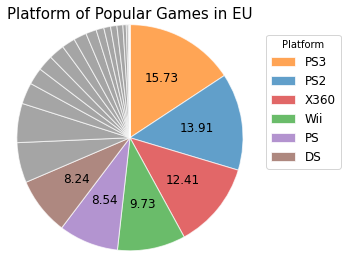

In [326]:
EU_pub = popEU.groupby('Platform')['EU_Sales'].sum()
EU_pub = EU_pub.sort_values(ascending=False)

def my_autopct(pct):
    return ('%.2f' % pct) if pct > 6 else ''
labels=EU_pub.index

plt.pie(EU_pub, autopct=my_autopct, startangle=90, counterclock=False, radius=1.3,
        textprops=dict(size=12), wedgeprops=dict(edgecolor='white', alpha=0.7), colors=[cdict[x] for x in labels]);
plt.title('Platform of Popular Games in EU', fontsize=15, pad=10)
plt.legend(labels=EU_pub.index[:6], bbox_to_anchor=(1.1, 0, 0, 1), fontsize=12, title='Platform')
plt.show()

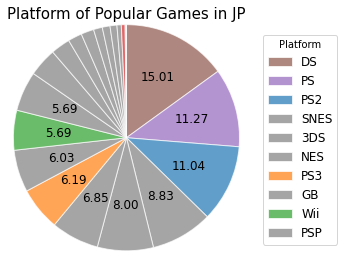

In [327]:
JP_pub = popJP.groupby('Platform')['JP_Sales'].sum()
JP_pub = JP_pub.sort_values(ascending=False)

def my_autopct(pct):
    return ('%.2f' % pct) if pct > 5.3 else ''
labels=JP_pub.index

plt.pie(JP_pub, autopct=my_autopct, startangle=90, counterclock=False, radius=1.3,
        textprops=dict(size=12), wedgeprops=dict(edgecolor='white', alpha=0.7), colors=[cdict[x] for x in labels]);
plt.title('Platform of Popular Games in JP', fontsize=15, pad=10)
plt.legend(labels=JP_pub.index[:10], bbox_to_anchor=(1.1, 0, 0, 1), fontsize=12, title='Platform')
plt.show()

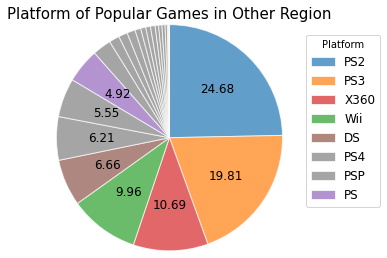

In [328]:
Other_pub = popOther.groupby('Platform')['Other_Sales'].sum()
Other_pub = Other_pub.sort_values(ascending=False)

def my_autopct(pct):
    return ('%.2f' % pct) if pct > 4 else ''
labels=Other_pub.index

plt.pie(Other_pub, autopct=my_autopct, startangle=90, counterclock=False, radius=1.3,
        textprops=dict(size=12), wedgeprops=dict(edgecolor='white', alpha=0.7), colors=[cdict[x] for x in labels]);
plt.title('Platform of Popular Games in Other Region', fontsize=15, pad=10)
plt.legend(labels=Other_pub.index[:8], bbox_to_anchor=(1.1, 0, 0, 1), fontsize=12, title='Platform')
plt.show()

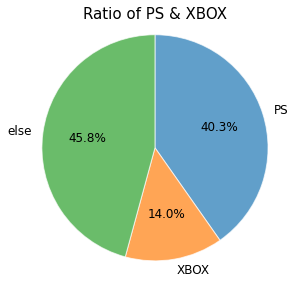

In [52]:
ps = df3['Platform'].str.contains('PS').value_counts()
xbox = (df3['Platform'].str.contains('X360') | df3['Platform'].str.contains('XB') | df3['Platform'].str.contains('XOne')).value_counts()
ratio = [ps[1], xbox[1], df3.shape[0]-ps[1]-xbox[1]]

labels = ['PS', 'XBOX', 'else']

plt.pie(ratio, autopct='%.1f%%', startangle=90, counterclock=False, radius=1.3, labels=labels,
        textprops=dict(size=12), wedgeprops=dict(edgecolor='white', alpha=0.7));
plt.title('Ratio of PS & XBOX', fontsize=15, pad=20)
plt.show()

---
- 전체 게임 데이터의 플랫폼에 따른 장르

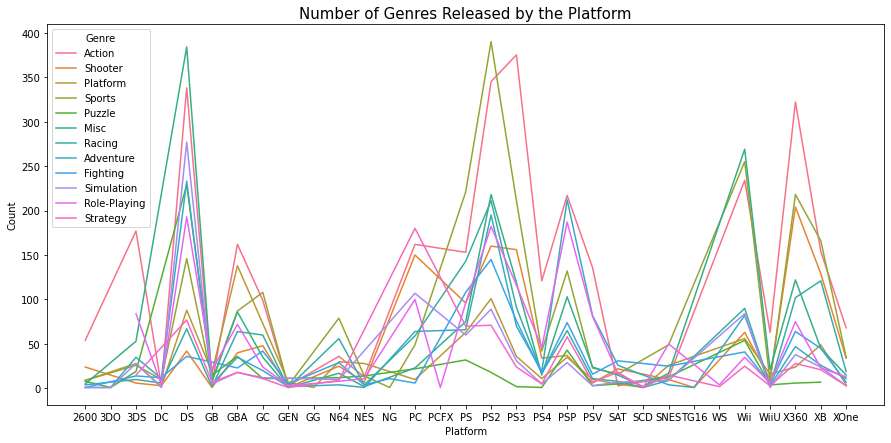

In [337]:
gen_plat = df3.groupby('Platform')['Genre'].value_counts()
gen_plat = gen_plat.to_frame(name='Count').reset_index()

plt.figure(figsize=[15,7])
sns.lineplot(data=gen_plat, x='Platform', y='Count', hue='Genre')
plt.title('Number of Genres Released by the Platform', fontsize=15);

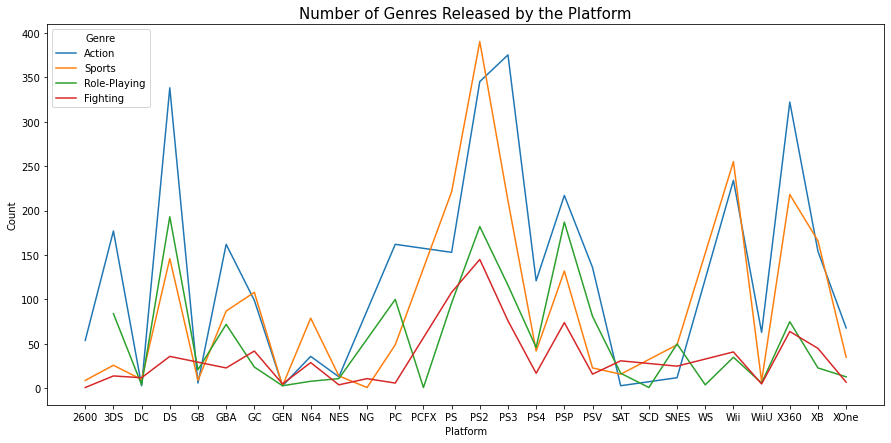

In [338]:
plt.figure(figsize=[15,7])
topgen = ['Action', 'Sports', 'Role-Playing', 'Fighting']
gen_plat = gen_plat[gen_plat['Genre'].isin(topgen)]
sns.lineplot(data=gen_plat, x='Platform', y='Count', hue='Genre', hue_order=topgen)
plt.title('Number of Genres Released by the Platform', fontsize=15);